In [25]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

In [26]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

import numpy
import matplotlib.pyplot
%matplotlib inline

# scipy.ndimage for rotating image arrays
import scipy.ndimage
import scipy.special

loading ...  my_own_images/2828_my_own_3.png
0.01
1.0
[3.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01    

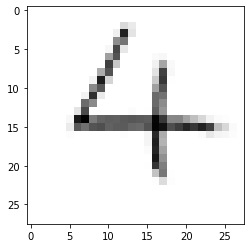

In [27]:
# our own image test data set
our_own_dataset = []

for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    print ("loading ... ", image_file_name)
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    # load image data from png files into an array
    img_array = imageio.imread(image_file_name, as_gray=True)
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    print(record)
    our_own_dataset.append(record)
    pass

matplotlib.pyplot.imshow(our_own_dataset[3][1:].reshape(28,28), cmap='Greys', interpolation='None')

print(our_own_dataset[0])

0.01
1.0
0.009999999999999998
0.9974879535602992


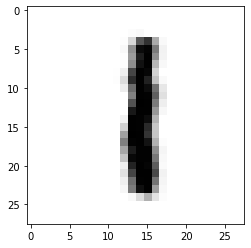

In [28]:
# open the CSV file and read its contents into a list
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

# which record will be use
record = 6
# which record will be use
record = 6
# scale input to range 0.01 to 1.00
all_values = data_list[record].split(',')
scaled_input = ((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01).reshape(28,28)
print(numpy.min(scaled_input))
print(numpy.max(scaled_input))

# plot the original image
matplotlib.pyplot.imshow(scaled_input, cmap='Greys', interpolation='None')

# create rotated variations
# rotated anticlockwise by 10 degrees
inputs_plus10_img = scipy.ndimage.rotate(scaled_input, 10.0, cval=0.01, order=1, reshape=False)
# rotated clockwise by 10 degrees
inputs_minus10_img = scipy.ndimage.rotate(scaled_input, -10.0, cval=0.01, order=1, reshape=False)

print(numpy.min(inputs_plus10_img))
print(numpy.max(inputs_plus10_img))

# plot the +10 degree rotated variation
matplotlib.pyplot.imshow(inputs_plus10_img, cmap='Greys', interpolation='None')

# plot the +10 degree rotated variation
matplotlib.pyplot.imshow(inputs_minus10_img, cmap='Greys', interpolation='None')

In [29]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    
    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [30]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [31]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [32]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

[[1.62028998e-03]
 [1.00323049e-02]
 [1.12998755e-02]
 [3.29776474e-02]
 [2.99961837e-04]
 [8.76170677e-01]
 [1.17296817e-02]
 [1.08798895e-02]
 [2.68664579e-05]
 [1.65851066e-03]]
network says  5
match!


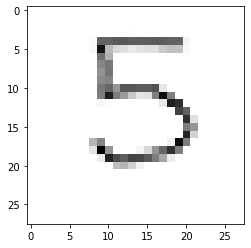

In [33]:
# FOR TESTING "5"
# test the neural network with our own images

# record to test
item = 2

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass


loading ... my_own_images/2828_my_own_image.png
min =  0.01
max =  1.0
[[2.31084121e-03]
 [1.08669236e-03]
 [1.15293956e-02]
 [9.95143458e-01]
 [3.12769126e-04]
 [5.17344133e-03]
 [2.72248662e-02]
 [4.50107256e-03]
 [2.76170044e-04]
 [1.14796404e-02]]
network says  3


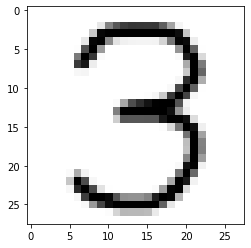

In [34]:
# FOR TESTING "3"
# test the neural network with our own images

# load image data from png files into an array
print ("loading ... my_own_images/2828_my_own_image.png")
img_array = imageio.imread('my_own_images/2828_my_own_image.png', as_gray=True)
    
# reshape from 28x28 to list of 784 values, invert values
img_data  = 255.0 - img_array.reshape(784)
    
# then scale data to range from 0.01 to 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01
print("min = ", numpy.min(img_data))
print("max = ", numpy.max(img_data))

# plot image
matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

# query the network
outputs = n.query(img_data)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
